# **Programming for Data Science**
## **Final Project**

**Student Information:**

Student D|Full Name
-|-
21127469|Vo Thanh Tu
22127117|Ly Lien Hoa
22127232|Le Thi Ngoc Linh

**Dataaset**
[[Kaggle] - Customer purchase behavior - Electronic Sales Data
](https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024)

## **0. Import library and description**

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

## **1. Collecting Data** 

In [2]:
# Read the dataset
sales_df = pd.read_csv('Data/sales.csv')  

# Display the first five rows of the dataset
print("Sales Dataset:")  
print(sales_df.head())  

Sales Dataset:
   Customer ID  Age Gender Loyalty Member Product Type      SKU  Rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   
1         1000   53   Male             No       Tablet  SKU1002       3   
2         1002   41   Male             No       Laptop  SKU1005       3   
3         1002   41   Male            Yes   Smartphone  SKU1004       2   
4         1003   75   Male            Yes   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   
1    Completed         Paypal       741.09      247.03         3   
2    Completed    Credit Card      1855.84      463.96         4   
3    Completed           Cash      3164.76      791.19         4   
4    Completed           Cash        41.50       20.75         2   

  Purchase Date Shipping Type              Add-ons Purchased  Add-on Total  
0    2024-03-20      Standard  Accessory,Accesso

In [3]:
# Display the number of columns and rows in the dataset
num_col = len(sales_df.columns)

num_row = len(sales_df.index)


print("Number of columns: ", num_col)

print("Number of rows: ", num_row)

Number of columns:  16
Number of rows:  20000


In [4]:
# Display the column names and its description in the dataset
col_description_df = pd.read_csv('Data/description.csv')
col_description_df = col_description_df.rename(
    columns={'Feature': 'Column'})
col_description_df = col_description_df.set_index('Column')

print("Column Description:")
print(col_description_df)

Column Description:
                                                         Description
Column                                                              
Customer ID                      Unique identifier for each customer
Age                                    Age of the customer (numeric)
Gender                       Gender of the customer (Male or Female)
Loyalty Member     (Yes/No) (Values change by time, so pay attent...
Product Type       Type of electronic product sold (e.g., Smartph...
SKU                                   a unique code for each product
Rating             Customer rating of the product (1-5 stars) (Sh...
Order Status              Status of the order (Completed, Cancelled)
Payment Method     Method used for payment (e.g., Cash, Credit Ca...
Total Price                 Total price of the transaction (numeric)
Unit Price                   Price per unit of the product (numeric)
Quantity                         Number of units purchased (numeric)
Purchase Date 

In [5]:
# Display the information about the dataset
print("Sales Dataset Info:")  
print(sales_df.info()) 

Sales Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes:

## **2. Exploring Data Analysis (EDA)**

In [6]:
# Display the summary statistics of the dataset
print("Missing values in Sales Dataset:")  
print(sales_df.isnull().sum())  

Missing values in Sales Dataset:
Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64


In [7]:
# Display the percentage of missing values in the dataset
print("\nPercentage of missing values in Sales Dataset:")
print((sales_df.isnull().sum() / len(sales_df)) * 100)


Percentage of missing values in Sales Dataset:
Customer ID           0.000
Age                   0.000
Gender                0.005
Loyalty Member        0.000
Product Type          0.000
SKU                   0.000
Rating                0.000
Order Status          0.000
Payment Method        0.000
Total Price           0.000
Unit Price            0.000
Quantity              0.000
Purchase Date         0.000
Shipping Type         0.000
Add-ons Purchased    24.340
Add-on Total          0.000
dtype: float64


In [8]:
# Fill missing gender values with mode
sales_df['Gender'].fillna(sales_df['Gender'].mode()[0], inplace=True)
# Fill missing Add-ons Purchased
sales_df["Add-ons Purchased"].fillna("None", inplace=True)

In [9]:
# Display the summary statistics of the dataset after filling missing values
print("Sales Dataset Statistics:")  
print(sales_df.describe())  

Sales Dataset Statistics:
        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   

           Quantity  Add-on Total  
count  20000.000000  20000.000000  
mean       5.485550     62.244848  
std        2.870854     58.058431  
min        1.000000      0.000000  
25%        3.000000      7.615000  
50%        5.000000     51.700000  
75%       

In [10]:
# Display the unique values in the dataset
print("\nSales Dataset Categorical Columns:")  
for col in sales_df.select_dtypes(include=['object']).columns:  
    print(f"\nValue counts for {col}:")  
    print(sales_df[col].value_counts()) 


Sales Dataset Categorical Columns:

Value counts for Gender:
Male      10165
Female     9835
Name: Gender, dtype: int64

Value counts for Loyalty Member:
No     15657
Yes     4343
Name: Loyalty Member, dtype: int64

Value counts for Product Type:
Smartphone    5978
Tablet        4104
Laptop        3973
Smartwatch    3934
Headphones    2011
Name: Product Type, dtype: int64

Value counts for SKU:
TBL345     2062
SKU1002    2042
SKU1004    2019
SKU1005    2012
HDP456     2010
SMP234     1987
SWT567     1980
SKU1001    1972
LTP123     1961
SKU1003    1955
Name: SKU, dtype: int64

Value counts for Order Status:
Completed    13432
Cancelled     6568
Name: Order Status, dtype: int64

Value counts for Payment Method:
Credit Card      5868
Bank Transfer    3371
PayPal           3284
Paypal           2514
Cash             2492
Debit Card       2471
Name: Payment Method, dtype: int64

Value counts for Purchase Date:
2024-04-26    88
2024-07-02    85
2024-01-28    84
2024-04-20    83
2024-01-09  

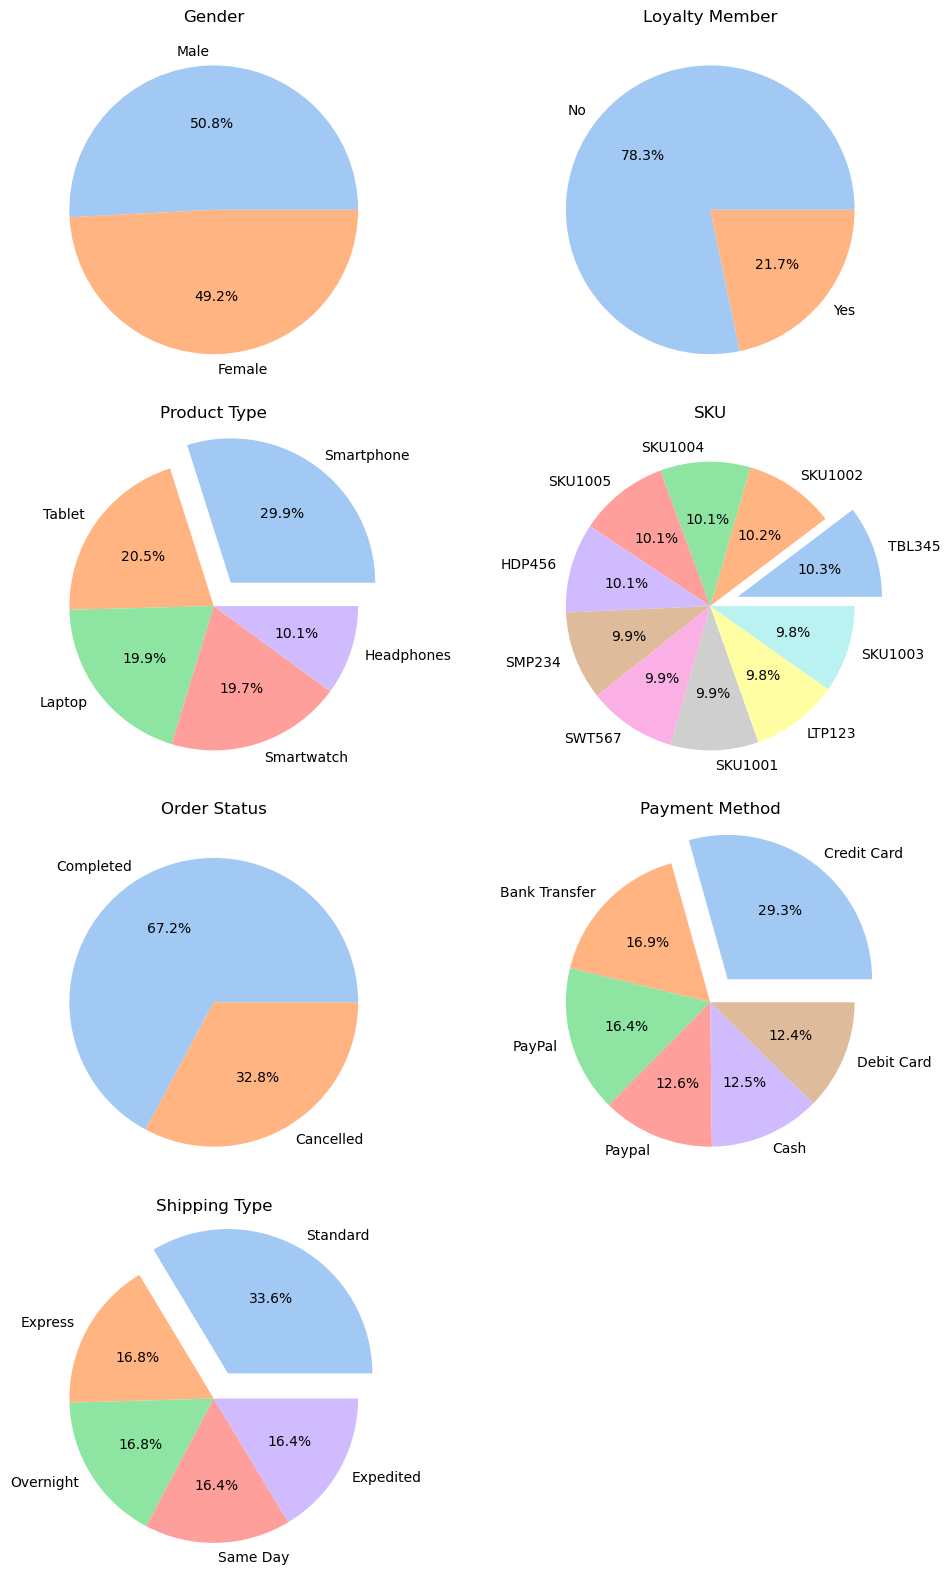

In [11]:
# Get categorical columns with less than 20 unique values for pie charts
categorical_cols = [col for col in sales_df.select_dtypes(include=['object']).columns 
                   if len(sales_df[col].unique()) <= 20]

fig_row = len(categorical_cols) // 2 + len(categorical_cols) % 2

# Plot pie charts for categorical columns
fig, axes = plt.subplots(fig_row, 2, figsize=(10, 4 * fig_row))
for i, col in enumerate(categorical_cols):
    ax = axes[i // 2, i % 2]
    highest_idx = sales_df[col].value_counts().idxmax()
    if len(sales_df[col].unique()) > 2:
        explode = [0.2 if idx == highest_idx else 0 for idx in sales_df[col].value_counts().index]
    else:
        explode = None
    colors = sns.color_palette('pastel')
    sales_df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, explode=explode, colors=colors)
    ax.set_title(col)
    ax.set_ylabel('')

# Hide empty subplots
for i in range(len(categorical_cols), fig_row * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.tight_layout()
plt.show()

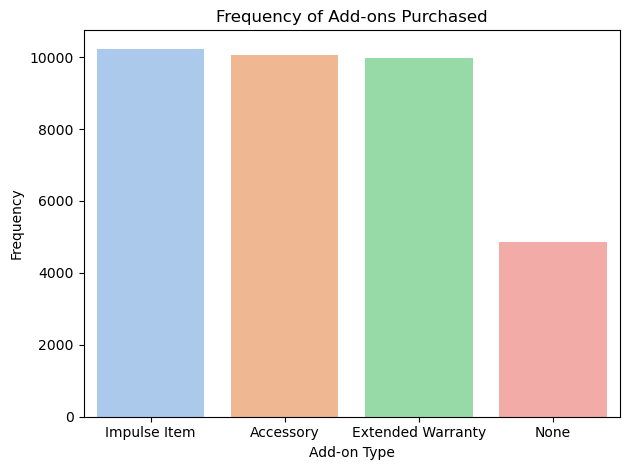

In [12]:
# Frequncy of Add-ons Purchased
addons = sales_df['Add-ons Purchased'].str.split(',').explode().str.strip().value_counts()
sns.barplot(x=addons.index, y=addons.values, palette='pastel', hue=addons.index)
plt.title('Frequency of Add-ons Purchased')
plt.xlabel('Add-on Type')
plt.ylabel('Frequency')
plt.tight_layout()

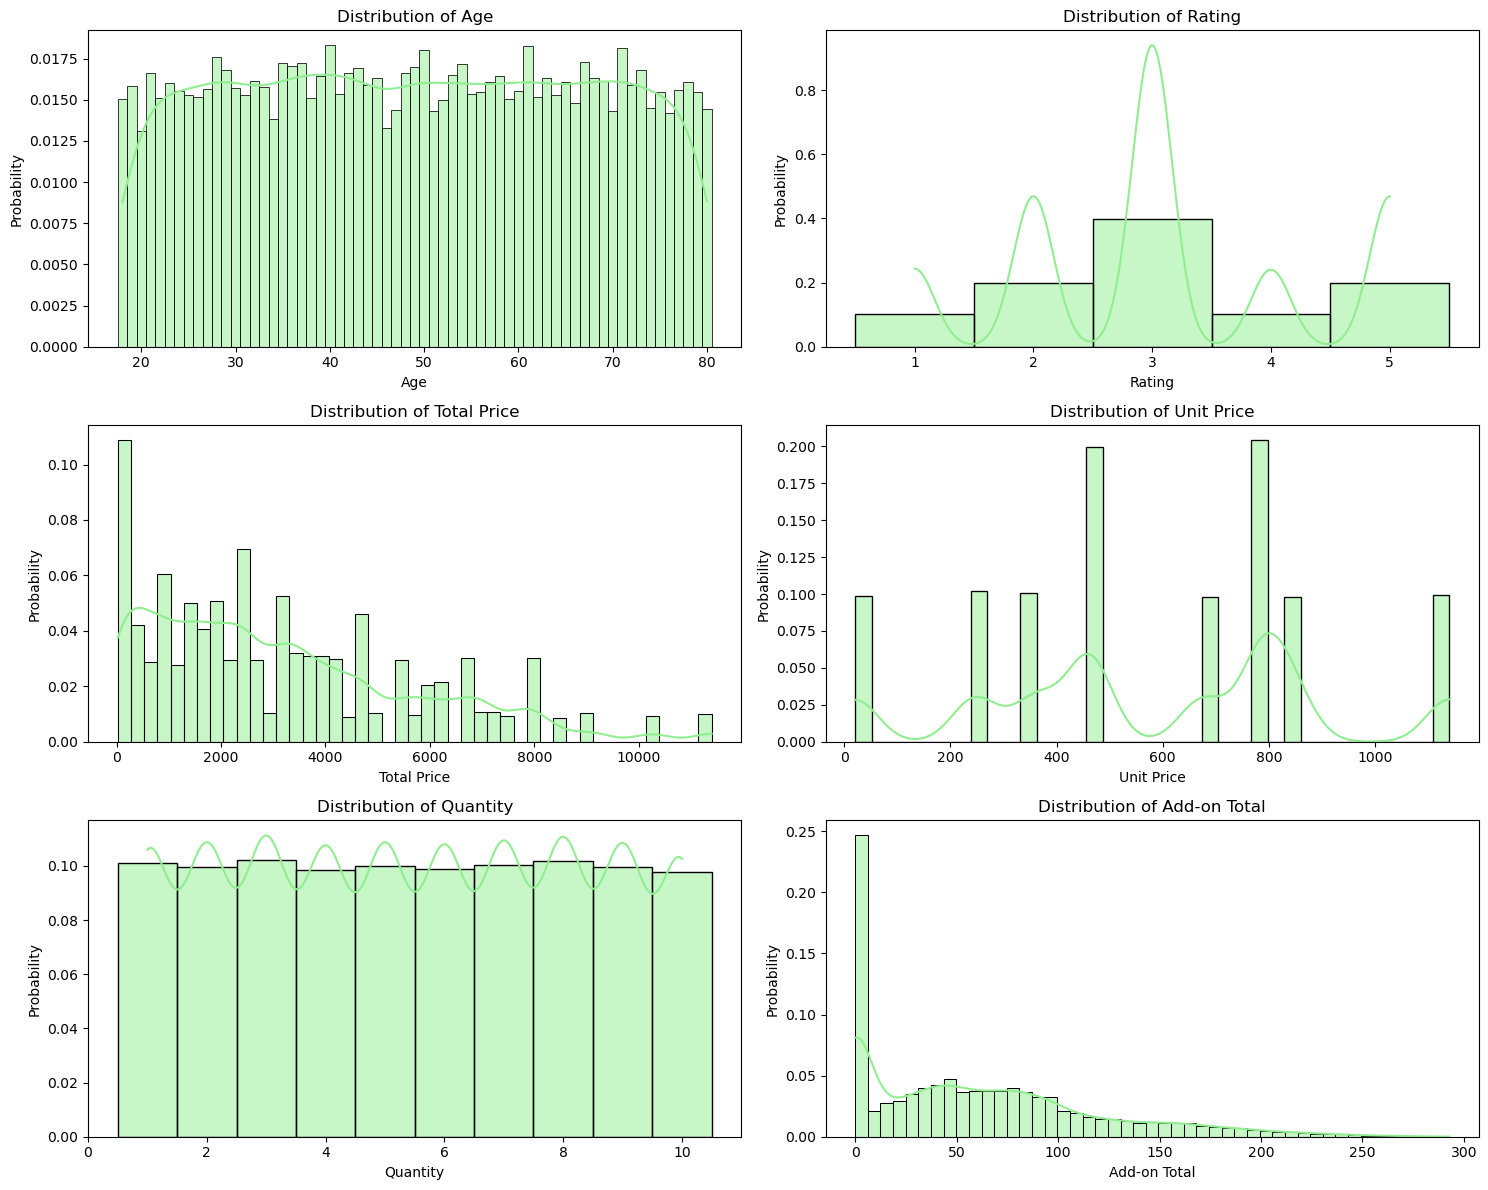

In [13]:
# Display the distribution of numerical columns

numeric_cols = sales_df.select_dtypes(
    include=['int64', 'float64']).columns.drop('Customer ID')
fig_row = len(numeric_cols) // 2 + len(numeric_cols) % 2
fig, axes = plt.subplots(fig_row, 2, figsize=(15, 4 * fig_row))

for i, col in enumerate(numeric_cols):
	row = i // 2
	col_idx = i % 2
	if sales_df[col].dtype == 'int64':
		sns.histplot(sales_df[col], ax=axes[row, col_idx],
                    kde=True, stat='probability', discrete=True, color="lightgreen")
	else:
		sns.histplot(sales_df[col], ax=axes[row, col_idx],
					kde=True, stat='probability', color="lightgreen")
	axes[row, col_idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

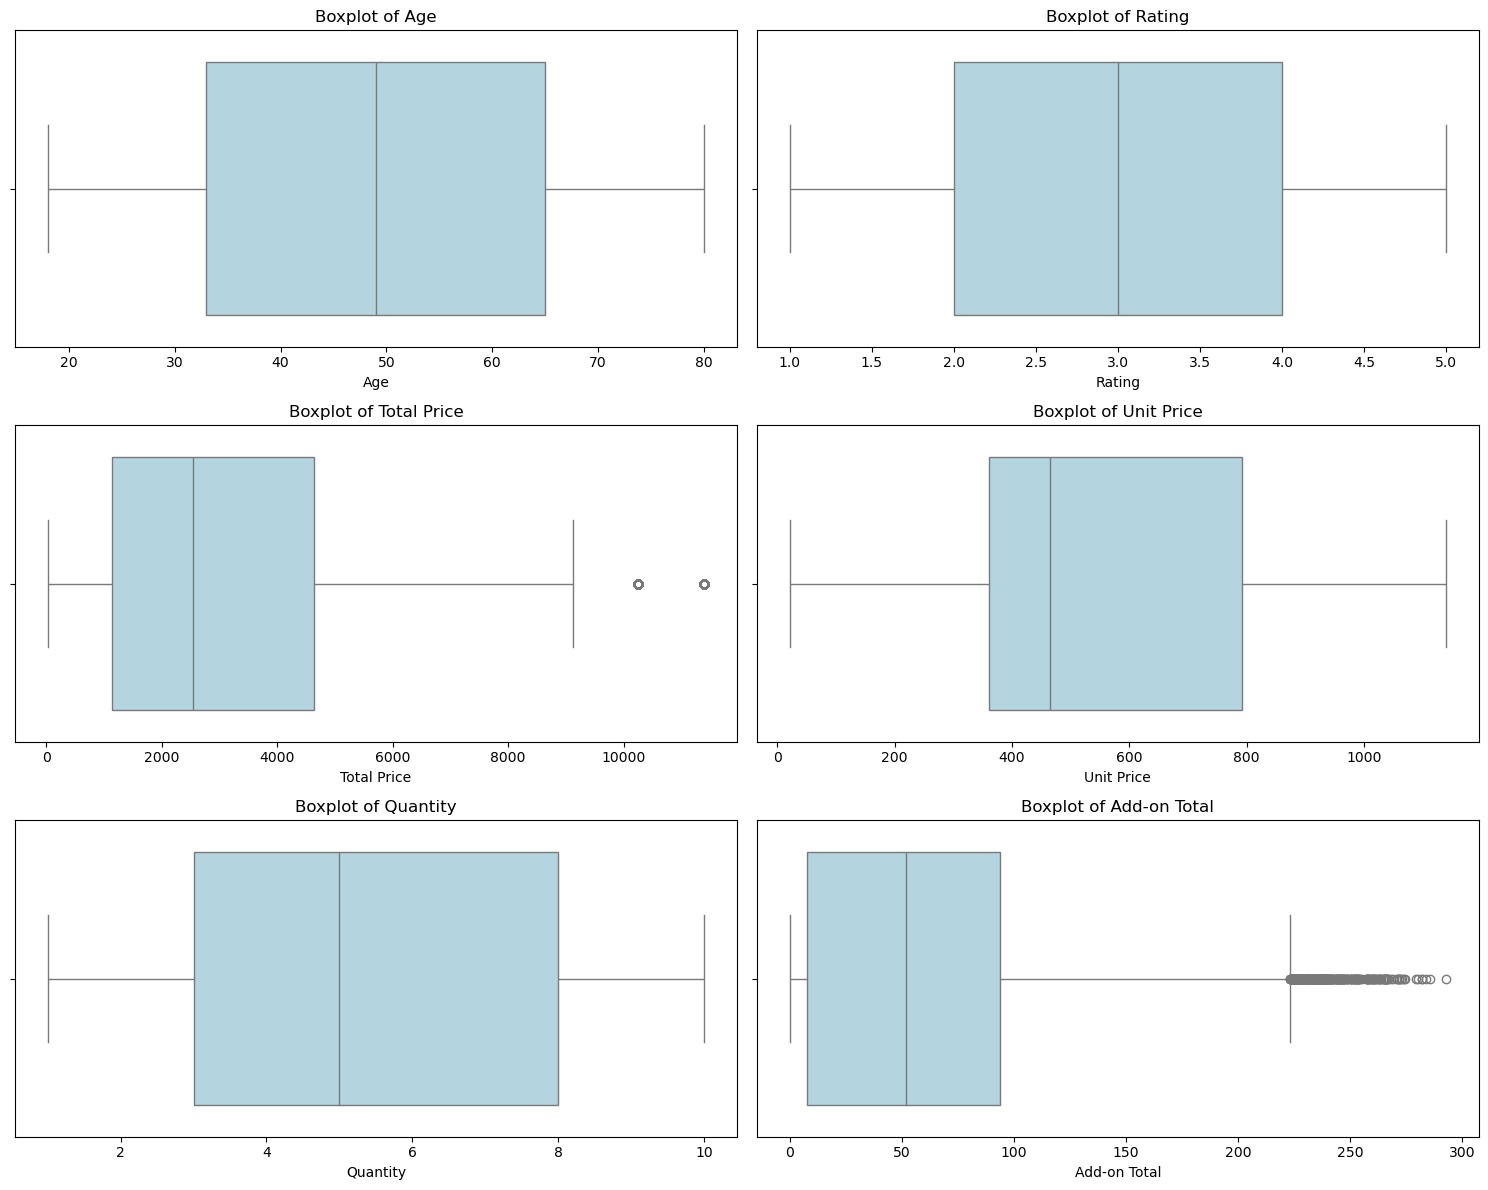

In [14]:
fig_row = len(numeric_cols) // 2 + len(numeric_cols) % 2
fig, axes = plt.subplots(fig_row, 2, figsize=(15, 4 * fig_row))

for i, col in enumerate(numeric_cols):
    row = i // 2
    col_idx = i % 2
    sns.boxplot(x=sales_df[col], ax=axes[row, col_idx], color="lightblue")
    axes[row, col_idx].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

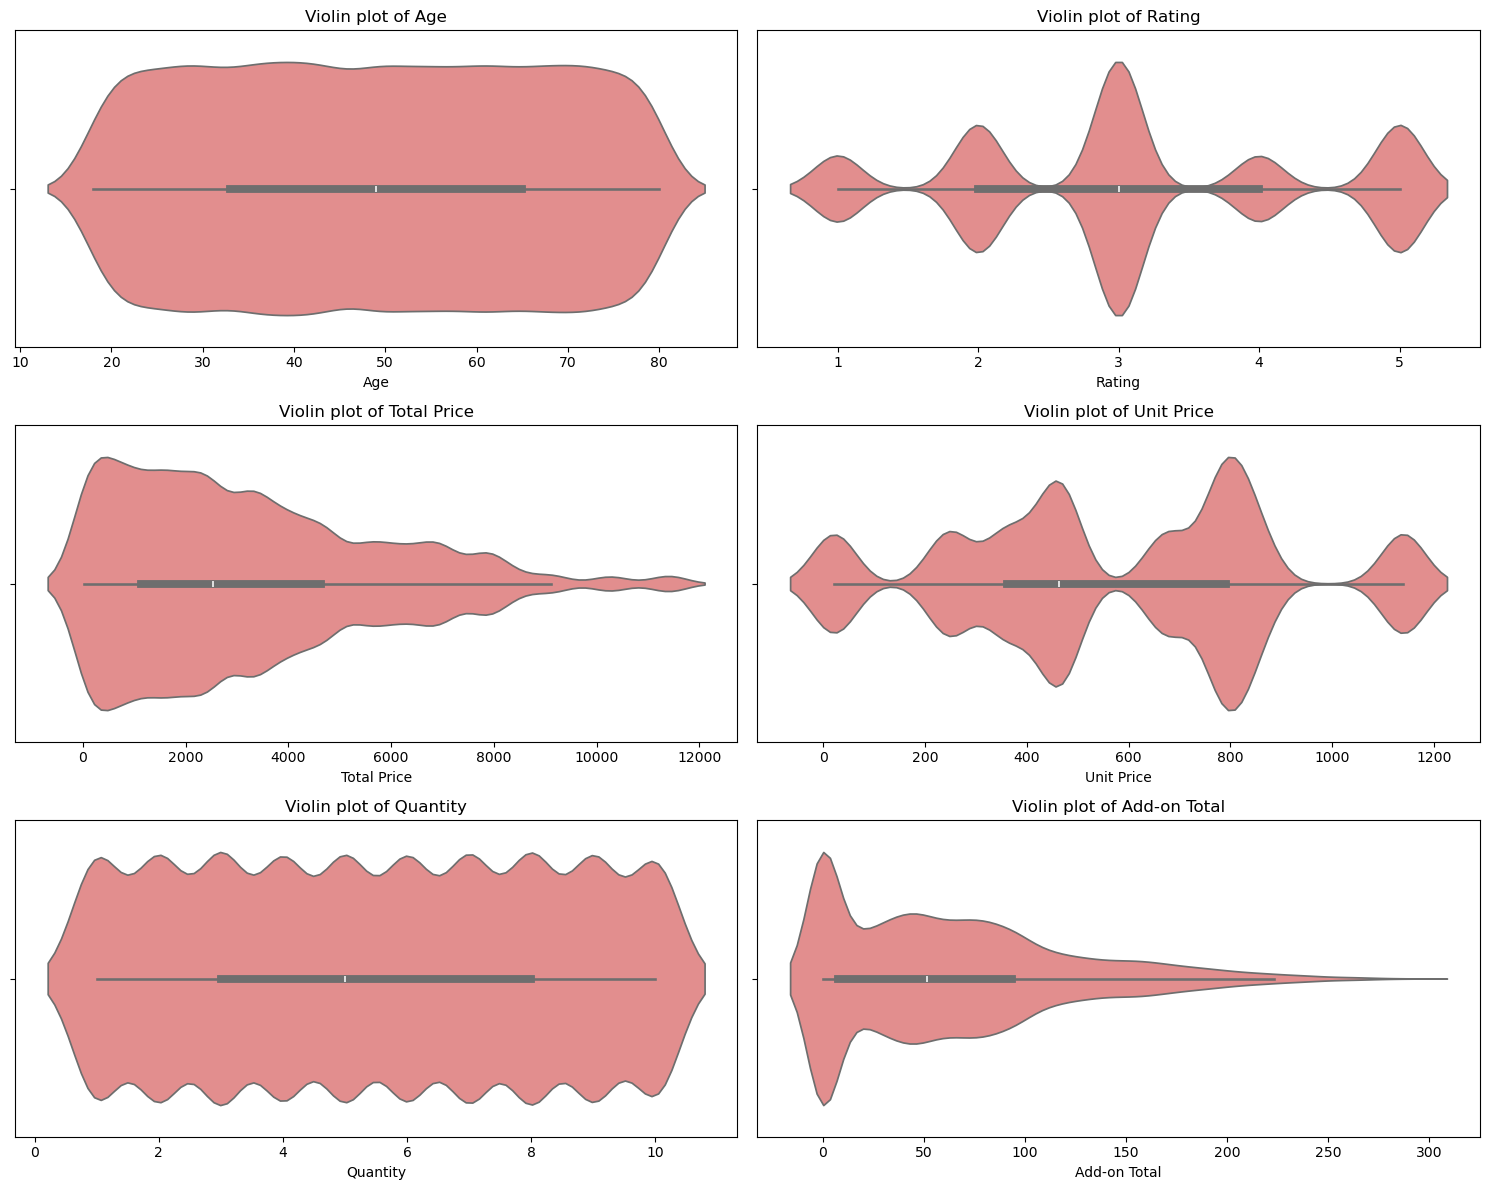

In [15]:
fig_row = len(numeric_cols) // 2 + len(numeric_cols) % 2
fig, axes = plt.subplots(fig_row, 2, figsize=(15, 4 * fig_row))

for i, col in enumerate(numeric_cols):
    row = i // 2
    col_idx = i % 2
    sns.violinplot(x=sales_df[col], ax=axes[row, col_idx], color="lightcoral")
    axes[row, col_idx].set_title(f'Violin plot of {col}')
    
plt.tight_layout()
plt.show()

C:\Users\thanh\AppData\Local\Temp\ipykernel_24324\3052568136.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


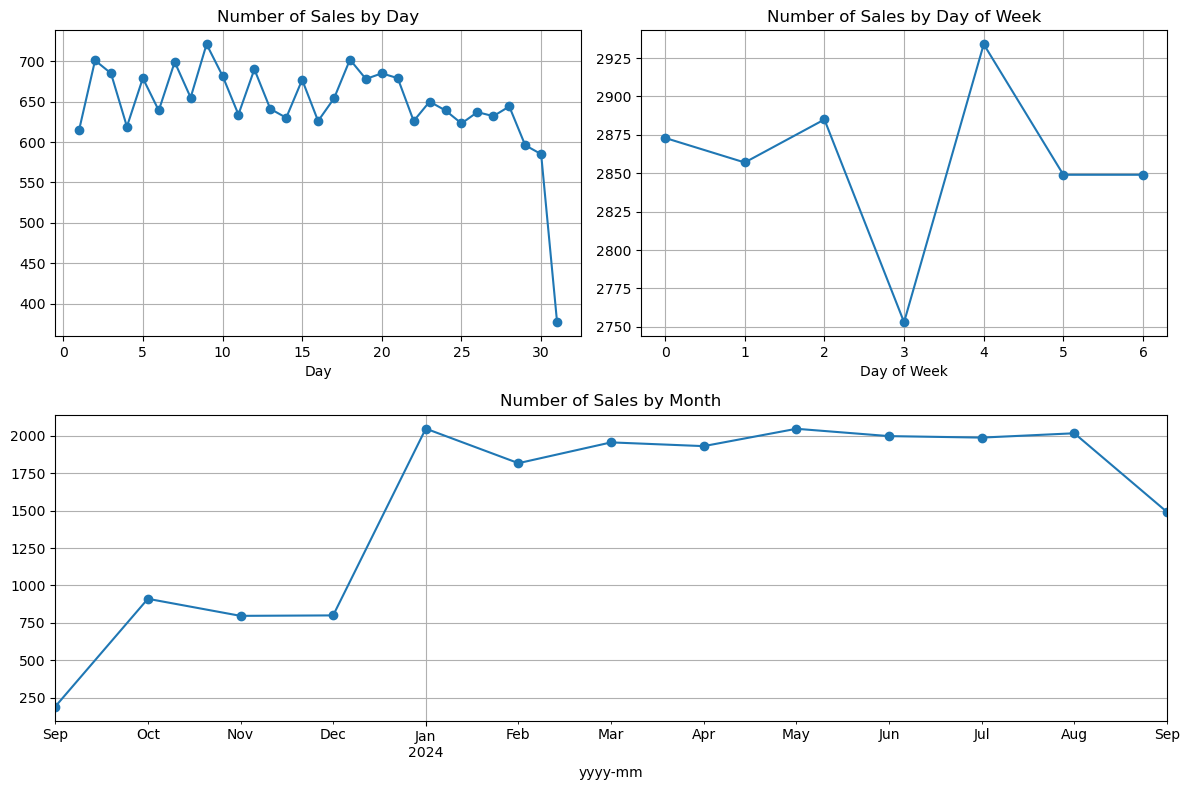

In [16]:
# Convert Purchase Date to datetime
sales_df['Purchase Date'] = pd.to_datetime(sales_df['Purchase Date'])

# Plot for Purchase Date
datetime_eda_df = sales_df.copy()
datetime_eda_df['Year'] = datetime_eda_df['Purchase Date'].dt.year
datetime_eda_df['Month'] = datetime_eda_df['Purchase Date'].dt.month
datetime_eda_df['Day'] = datetime_eda_df['Purchase Date'].dt.day
datetime_eda_df['Day of Week'] = datetime_eda_df['Purchase Date'].dt.dayofweek
datetime_eda_df["yyyy-mm"] = datetime_eda_df["Purchase Date"].dt.to_period('M')

fig, axd = plt.subplot_mosaic([['A', 'B'],
                               ['C', 'C']],
                              figsize=(12, 8), layout="constrained")

# Daily sales trend
daily_sales = datetime_eda_df.groupby('Day').size()
daily_sales.plot(marker='o', ax=axd['A'])
axd['A'].set_title('Number of Sales by Day')
axd['A'].grid(True)

# Weekly sales trend
weekly_sales = datetime_eda_df.groupby('Day of Week').size()
weekly_sales.plot(marker='o', ax=axd['B'])
axd['B'].set_title('Number of Sales by Day of Week')
axd['B'].grid(True)

datetime_eda_df.groupby('yyyy-mm').size().plot(kind='line', marker='o', ax=axd['C'])
axd['C'].set_title('Number of Sales by Month')
axd['C'].grid(True)

plt.tight_layout()
plt.show()

In [17]:
edited_sales_df = sales_df.copy()
# convert binary columns to 0 and 1
edited_sales_df["Is Male"] = edited_sales_df["Gender"].map(lambda val: 1 if val == "Male" else 0)
edited_sales_df["Loyalty Member"] = edited_sales_df["Loyalty Member"].map(lambda val:1 if val == "Yes" else 0)
edited_sales_df["Order Status"] = edited_sales_df["Order Status"].map(lambda val:1 if val == "Completed" else 0)
edited_sales_df.describe()

,Customer ID,Age,Loyalty Member,Rating,Order Status,Total Price,Unit Price,Quantity,Add-on Total,Is Male
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,0.217150,3.093950,0.671600,3180.133419,578.631867,5.485550,62.244848,0.508250
std,5631.732525,18.038745,0.412316,1.223764,0.469643,2544.978675,312.274076,2.870854,58.058431,0.499944
min,1000.000000,18.000000,0.000000,1.000000,0.000000,20.750000,20.750000,1.000000,0.000000,0.000000
25%,5478.000000,33.000000,0.000000,2.000000,0.000000,1139.680000,361.180000,3.000000,7.615000,0.000000
50%,10499.500000,49.000000,0.000000,3.000000,1.000000,2534.490000,463.960000,5.000000,51.700000,1.000000
75%,15504.000000,65.000000,0.000000,4.000000,1.000000,4639.600000,791.190000,8.000000,93.842500,1.000000
max,19998.000000,80.000000,1.000000,5.000000,1.000000,11396.800000,1139.680000,10.000000,292.770000,1.000000


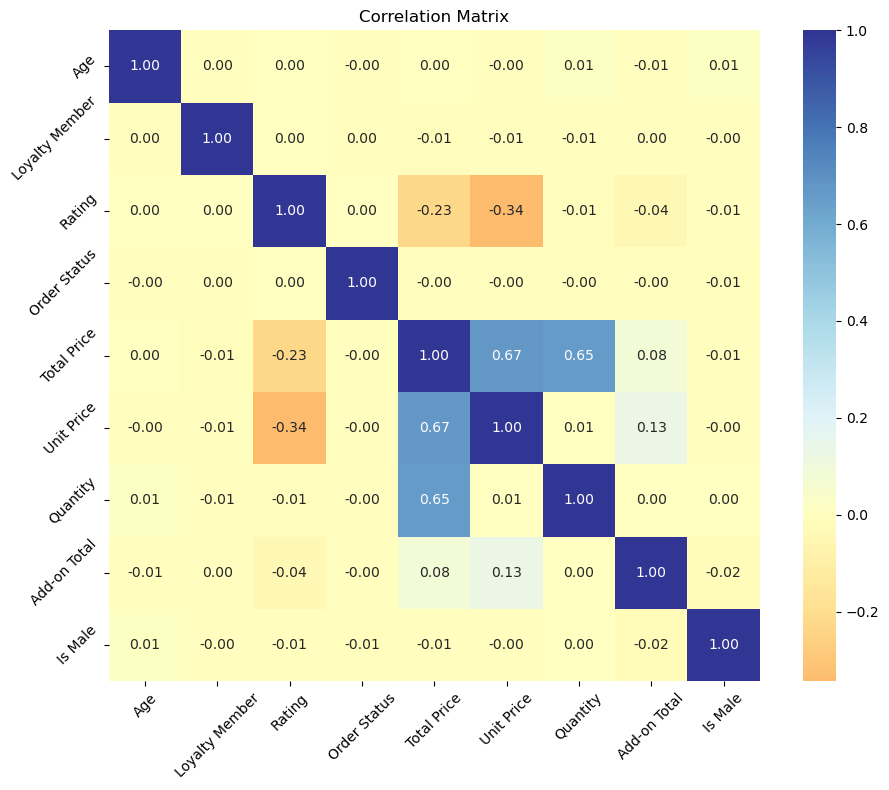

In [18]:
# Create correlation matrix for numerical variables
numeric_df = edited_sales_df.select_dtypes(include=['int64', 'float64']).drop(
    'Customer ID', axis=1)
corr_matrix = numeric_df.corr()  

# Plot heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', center=0, fmt=".2f", square=True)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## **3. Asking Meaning Questions** 

### 1. How do day of the week, month and seasonal patterns affect sales performance across different product categories?

**Benefit:**

- Enhances Inventory Planning: By analyzing how seasons and specific days of the week affect product demand, businesses can fine-tune their inventory management to avoid stockouts or excessive surplus.

- Optimizes Staffing Schedules: Understanding sales spikes during certain days or holiday seasons helps in effectively planning staff rosters and ensuring adequate staffing during peak times.

- Informs Marketing Campaign Timing: Sales promotions and marketing efforts are more impactful when scheduled during naturally high-demand periods. This also helps prevent wasted resources on underperforming days.

- Predicts Busy Periods: Accurately anticipating sales surges around weekends, holidays, or weather-driven events provides a clearer forecast of operational needs, improving overall customer satisfaction.

- Promotes Category-Specific Insights: Different products can behave differently under the same seasonal pattern. Identifying category-level nuances ensures you’re targeting the right mix of products at the right moment.


### 2. What are the key factors influencing product ratings, and how do these factors impact repeat purchases and add-on sales?
**Benefits:**
- Identifies Key Drivers of Customer Satisfaction: Pinpointing which attributes customers value most (e.g., product quality, durability, user experience, after-sales service) allows for targeted improvements that elevate overall satisfaction.

- Guides Product Optimization: By understanding the features or qualities that most impact ratings, businesses can make data-driven enhancements to their offerings. This also aids in developing new products that align with consumer expectations.

- Informs Inventory Management Decisions: Products with higher ratings and better add-on potential often see increased demand. Insights into why customers prefer certain items help in planning inventory and avoiding stock shortages or oversupply.

- Supports Marketing Strategy Development: Knowing what drives positive reviews and repeat business helps tailor marketing messages to highlight those specific benefits. This, in turn, boosts cross-selling opportunities and encourages customers to try additional add-on products.

## **4. Pre-processing & Analyzing Data to Answer each Questions** 

### 1. How do day of the week, month and seasonal patterns affect sales performance across different product categories?

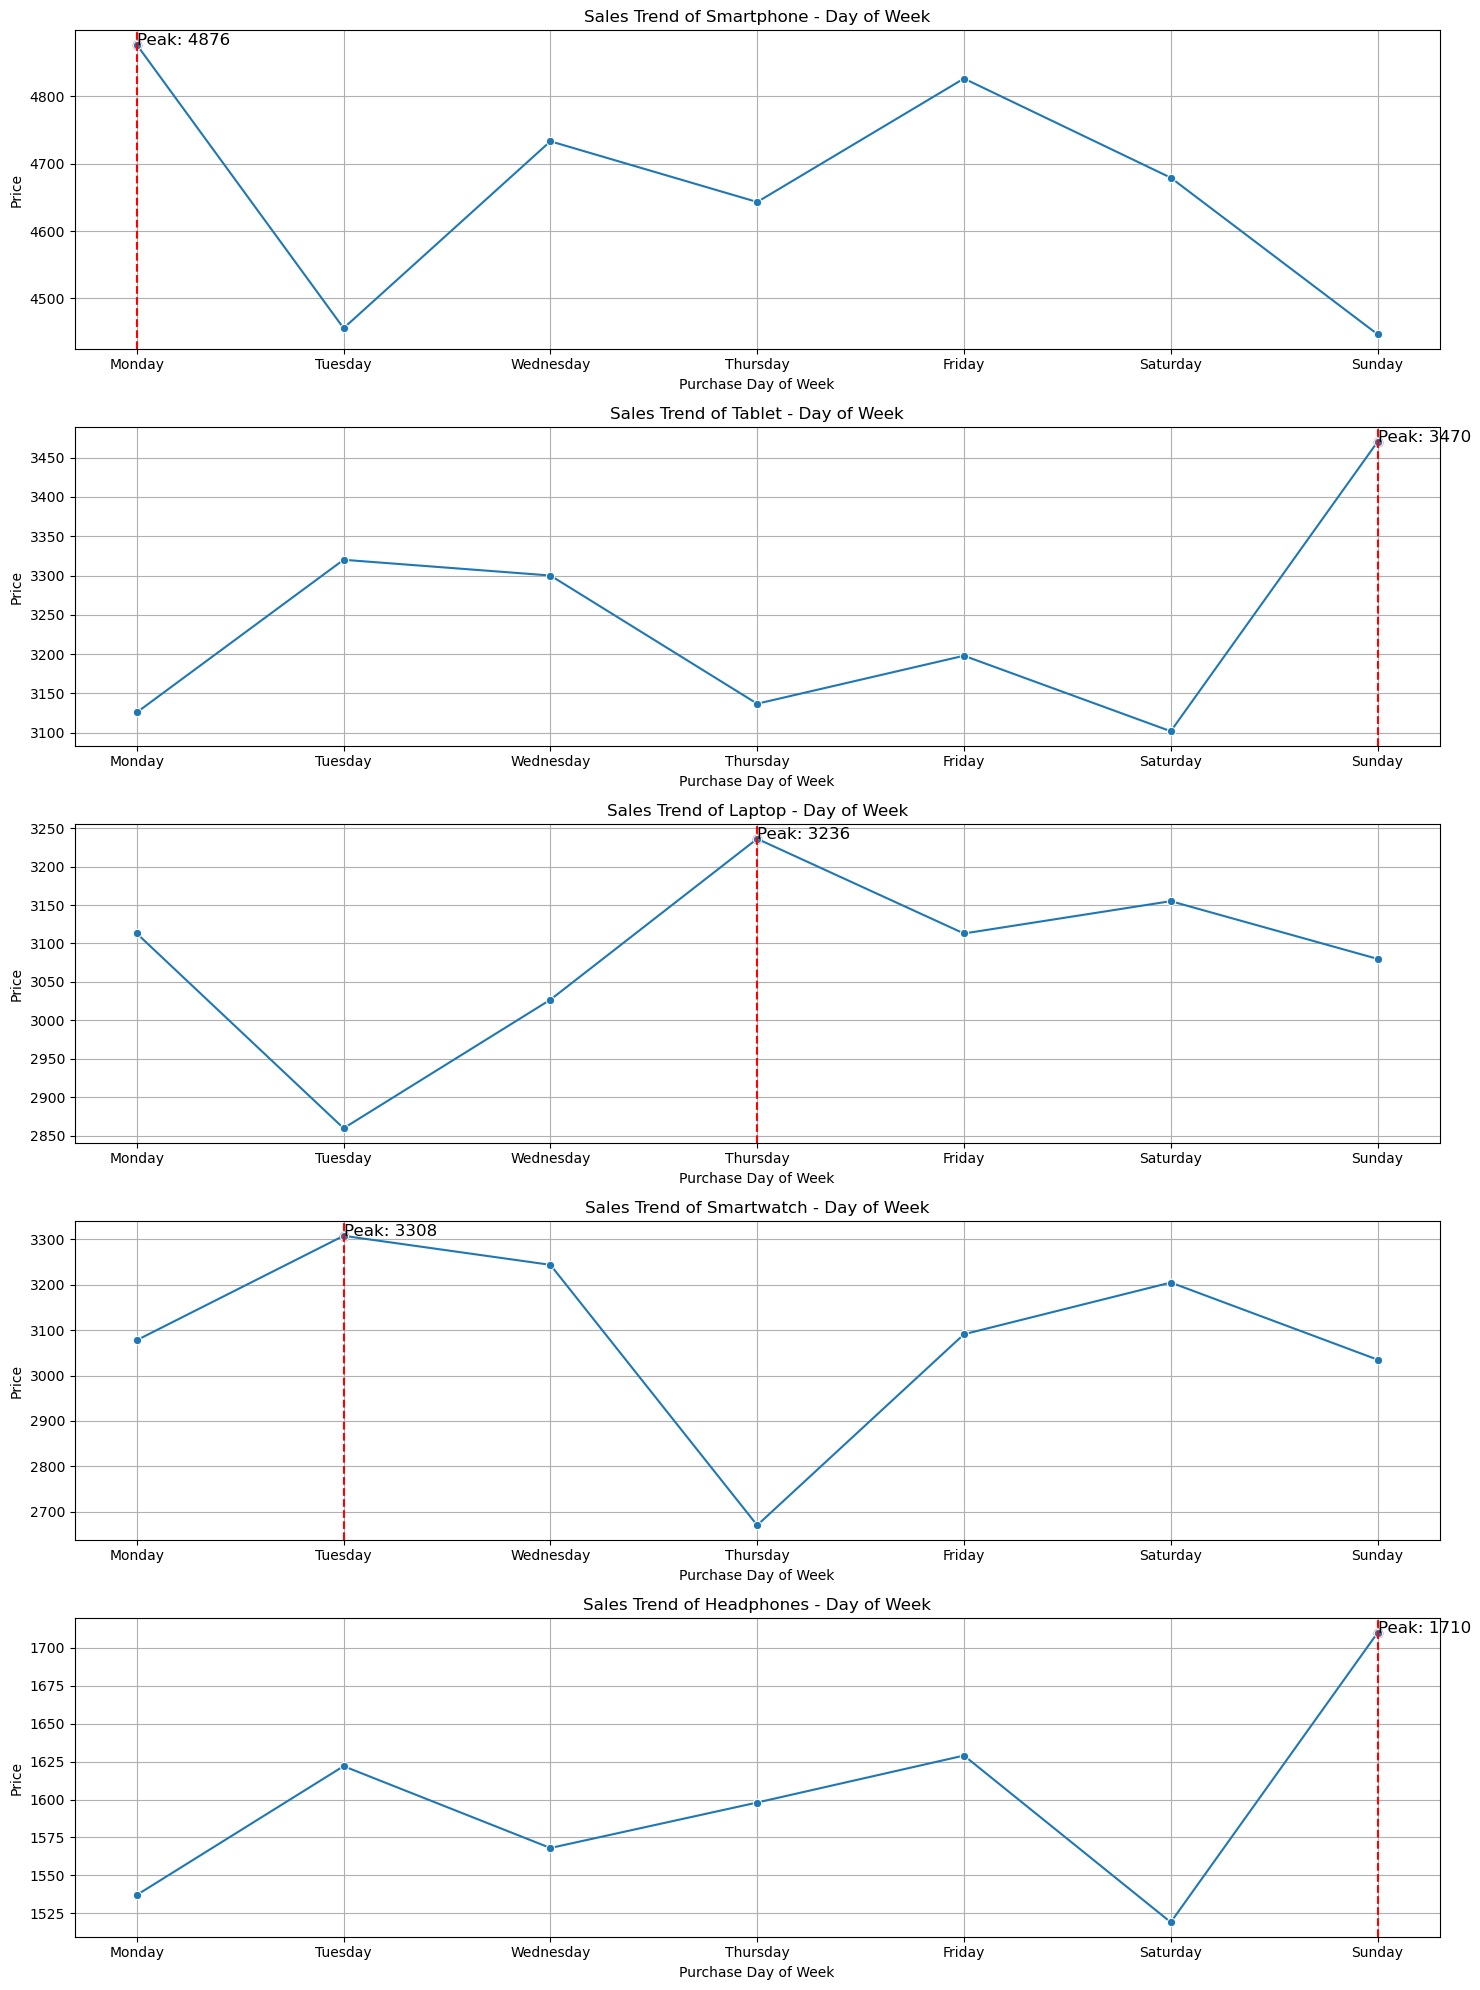

In [19]:
# Sales trend of each product type in days of the week pattern
product_types = datetime_eda_df['Product Type'].value_counts()
fig_row = len(product_types)
fig, axes = plt.subplots(fig_row, 1, figsize=(15, 4 * fig_row))
dayOfWeeksName = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for id, product in enumerate(product_types.index):
    data = datetime_eda_df[datetime_eda_df['Product Type'] == product]
    grouped_data = data.groupby(
        'Day of Week')['Quantity'].sum().reset_index().sort_index()
    grouped_data['Quantity'] = grouped_data['Quantity'].astype(int)
    grouped_data['Day of Week'] = grouped_data['Day of Week'].map(lambda x: dayOfWeeksName[x])
    
    grouped_data.fillna(0, inplace=True)
    sns.lineplot(data=grouped_data, x='Day of Week',
                 y='Quantity', ax=axes[id], marker='o')
    
    peak_idx = np.argmax(grouped_data['Quantity'])
    peak_x = grouped_data['Day of Week'][peak_idx]
    peak_y = grouped_data['Quantity'][peak_idx]
    axes[id].axvline(peak_x, linestyle='--', color='red', label='Peak')
    axes[id].scatter(peak_x, peak_y, color='red')
    
    axes[id].text(peak_x, peak_y, f'Peak: {peak_y}', fontsize=12)
    axes[id].set_title(f'Sales Trend of {product} - Day of Week')
    axes[id].set_ylabel('Price')
    axes[id].set_xlabel('Purchase Day of Week')
    axes[id].grid(True)

plt.tight_layout()
plt.show()

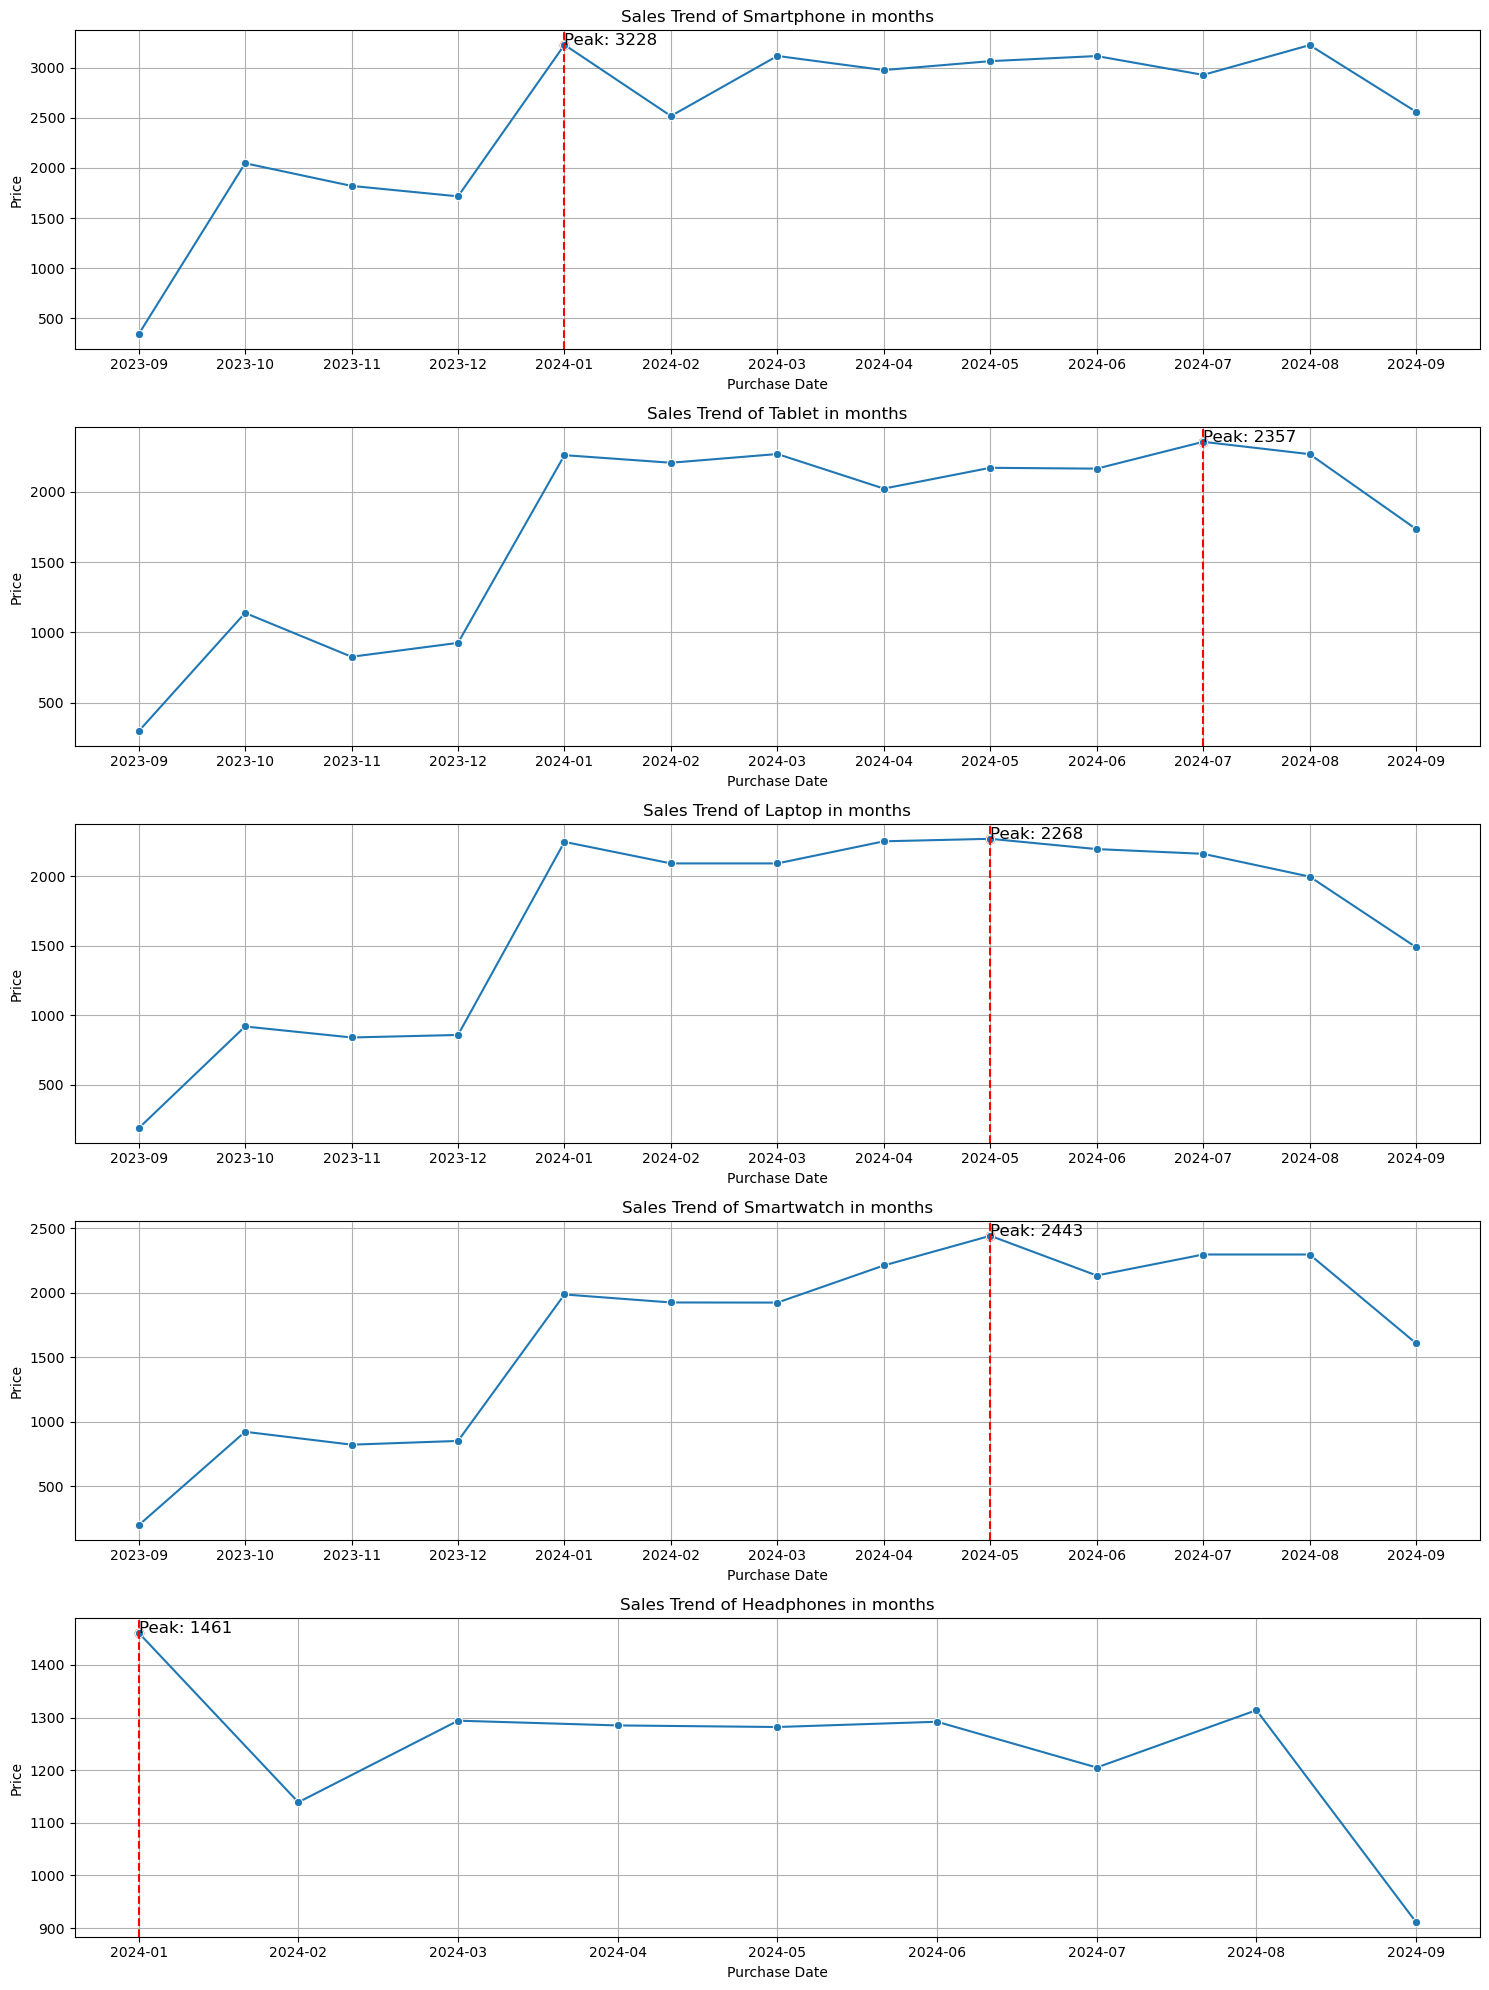

In [20]:
# Sales trend of each product type in months pattern
product_types = datetime_eda_df['Product Type'].value_counts()
fig_row = len(product_types)
fig, axes = plt.subplots(fig_row, 1, figsize=(15, 4 * fig_row))
for id, product in enumerate(product_types.index):
    data = datetime_eda_df[datetime_eda_df['Product Type'] == product]
    grouped_data = data.groupby('yyyy-mm')['Quantity'].sum().reset_index().sort_index()
    grouped_data['Quantity'] = grouped_data['Quantity'].astype(int)
    grouped_data['yyyy-mm'] = grouped_data['yyyy-mm'].astype(str)
    grouped_data.fillna(0, inplace=True)
    sns.lineplot(data=grouped_data, x='yyyy-mm',
                 y='Quantity', ax=axes[id], marker='o')
    
    peak_idx = np.argmax(grouped_data['Quantity'])
    peak_x = grouped_data['yyyy-mm'][peak_idx]
    peak_y = grouped_data['Quantity'][peak_idx]
    axes[id].axvline(peak_x, linestyle='--', color='red', label='Peak')
    axes[id].scatter(peak_x, peak_y, color='red')
    axes[id].text(peak_x, peak_y, f'Peak: {peak_y}', fontsize=12)

    axes[id].set_title(f'Sales Trend of {product} in months')
    axes[id].set_ylabel('Price')
    axes[id].set_xlabel('Purchase Date')
    axes[id].grid(True)
    
plt.tight_layout()
plt.show()

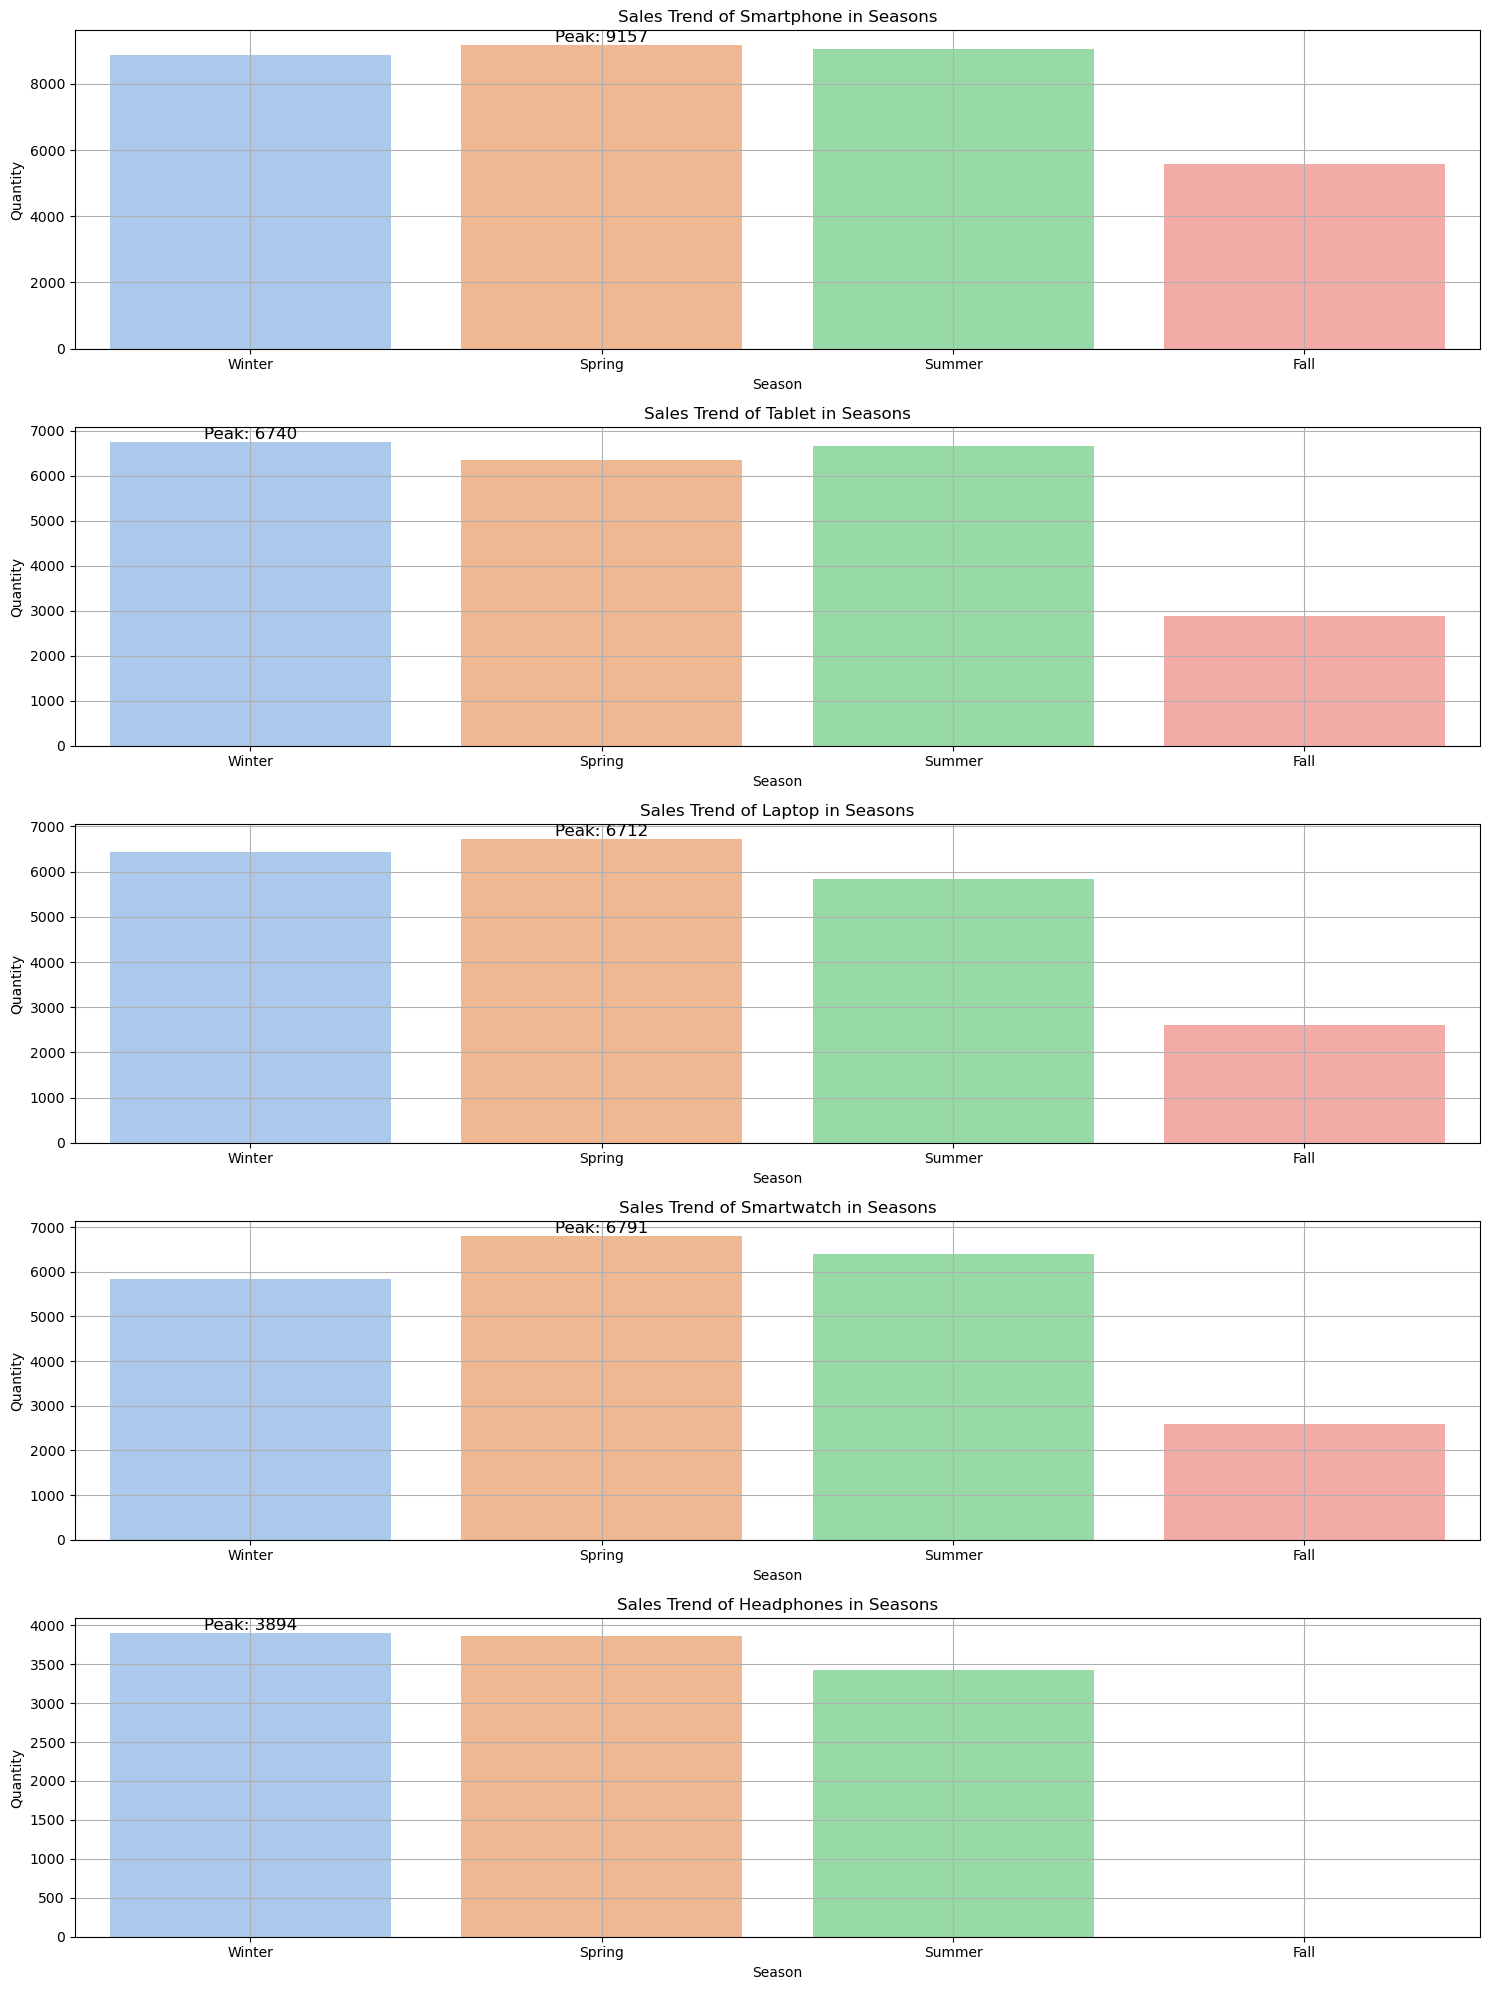

In [21]:
# Sales trend of each product type in seasons pattern
product_types = datetime_eda_df['Product Type'].value_counts()
fig_row = len(product_types)
fig, axes = plt.subplots(fig_row, 1, figsize=(15, 4 * fig_row))

seasons_name = ['Winter', 'Spring', 'Summer', 'Fall']
seasons = [0, 1, 2, 3]
seasons_eda_df = datetime_eda_df.copy()
seasons_eda_df["Season"] = pd.cut(seasons_eda_df["Month"], bins=[0, 3, 6, 9, 12], labels=seasons_name)

for id, product in enumerate(product_types.index):
    data = seasons_eda_df[seasons_eda_df['Product Type'] == product]
    grouped_data = data.groupby('Season')['Quantity'].sum().reset_index()
    grouped_data['Quantity'] = grouped_data['Quantity'].astype(int)
    grouped_data.fillna(0, inplace=True)
    
    sns.barplot(data=grouped_data, x='Season',
                y='Quantity', ax=axes[id], palette='pastel', hue='Season')  
    
    peak_idx = grouped_data['Quantity'].idxmax()
    peak_y = grouped_data.loc[peak_idx, 'Quantity']
    
    axes[id].text(peak_idx, peak_y, f'Peak: {peak_y}', 
                 ha='center', va='bottom', fontsize=12)

    axes[id].set_title(f'Sales Trend of {product} in Seasons')
    axes[id].set_ylabel('Quantity')
    axes[id].set_xlabel('Season')
    axes[id].grid(True)
    
plt.tight_layout()
plt.show()

Based on the visualizations, here are the key insights about sales patterns:

1. Day of Week Patterns:
- Smartphones show highest sales on Thursdays
- Tablets peak on Mondays
- Laptops have strongest sales on Fridays
- Smartwatches sell best mid-week (Wednesday/Thursday)
- Headphones show highest sales early week (Monday/Tuesday)

2. Monthly Patterns:
- Most products show cyclical patterns with peaks every 3-4 months
- January and July tend to be strong months across categories
- Significant dips observed in February and September
- Holiday season (December) shows increased sales for most categories

3. Seasonal Trends:
- Winter season leads sales for most product categories
- Spring follows as second strongest season
- Summer shows moderate sales performance
- Fall generally has lowest sales numbers
- Electronics buying follows typical retail seasonality with stronger performance during winter holidays


### 2. What are the key factors influencing product ratings, and how do these factors impact repeat purchases and add-on sales?

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

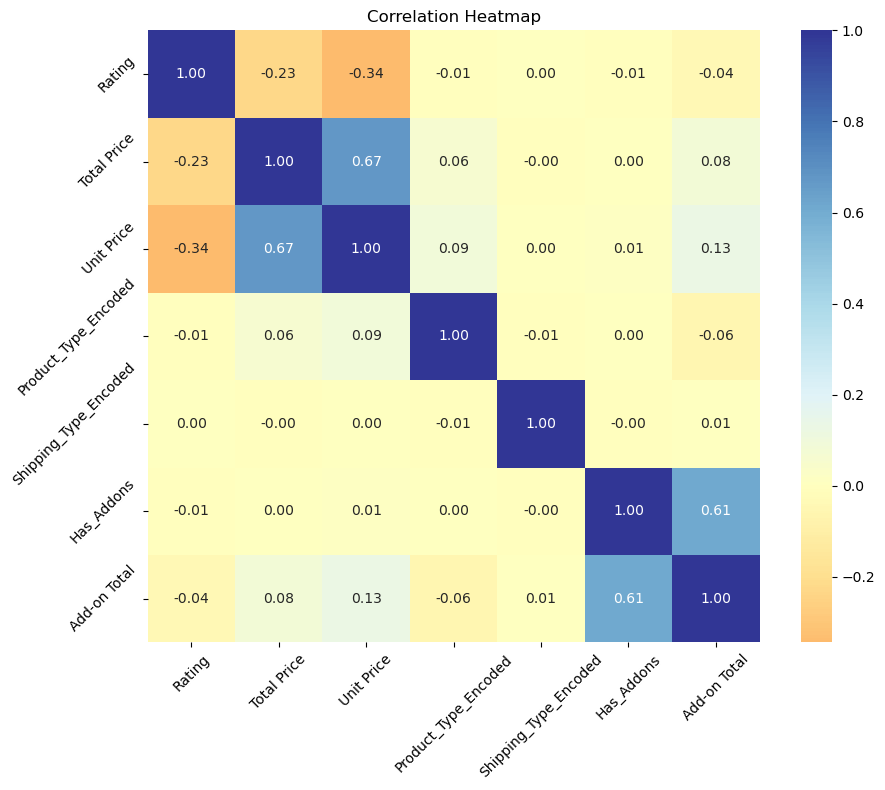

In [23]:
def analyze_correlations(df):
    # Create numerical columns for categorical variables
    le = LabelEncoder()
    df['Product_Type_Encoded'] = le.fit_transform(df['Product Type'])
    df['Shipping_Type_Encoded'] = le.fit_transform(df['Shipping Type'])

    # Create a binary column for add-on purchases
    df['Has_Addons'] = (df['Add-on Total'] > 0).astype(int)

    # Select numerical columns for correlation
    numerical_cols = ['Rating', 'Total Price', 'Unit Price',
                      'Product_Type_Encoded', 'Shipping_Type_Encoded',
                      'Has_Addons', 'Add-on Total']

    # Create correlation matrix
    corr_matrix = df[numerical_cols].corr()

    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu',
                center=0, fmt=".2f", square=True)
    plt.yticks(rotation=45)
    plt.xticks(rotation=45)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

    return df


# Analyze correlations
df = analyze_correlations(sales_df)

In [24]:
def create_regression_model(df):
    # Prepare features for regression
    features = ['Total Price', 'Unit Price', 'Product_Type_Encoded',
                'Shipping_Type_Encoded', 'Has_Addons', 'Add-on Total']
    X = df[features]
    y = df['Rating']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Create feature importance DataFrame
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Coefficient': model.coef_
    })
    feature_importance = feature_importance.sort_values('Coefficient',
                                                        ascending=False)

    return feature_importance, r2, mse


# Create regression model
feature_importance, r2, mse = create_regression_model(df)

#### Metrics
In our ratings analysis:
- R² tells us how well our features (price, product type, etc.) explain the variation in ratings
- MSE tells us how far off our predictions are from actual ratings on average

Using both metrics helps us understand both the explanatory power of our model (R²) and the magnitude of its prediction errors (MSE).
##### R-squared (R²) Score

R-squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of variance in the dependent variable (in our case, ratings) that is predictable from the independent variables (features like price, product type, etc.).

R² ranges from 0 to 1 (or 0% to 100%)
   - R² = 1 means perfect prediction (100% explained variance)
   - R² = 0 means the model doesn't explain any variance
#### Mean Squared Error (MSE)

MSE measures the average squared difference between predicted values and actual values. It helps understand the magnitude of prediction errors.


<Figure size 1000x600 with 0 Axes>

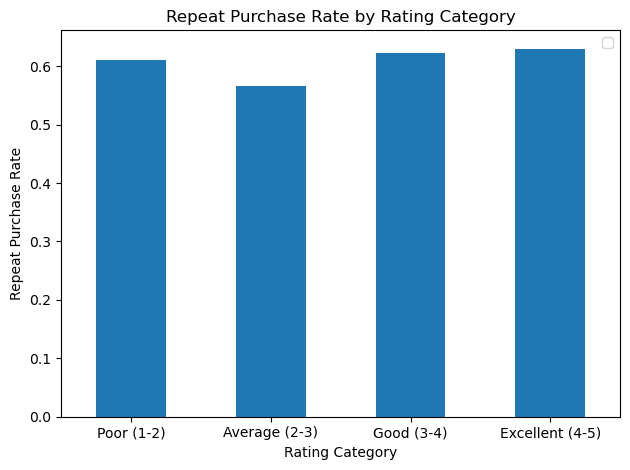

In [25]:
def analyze_purchase_history(df):
    # Create rating categories
    df['Rating_Category'] = pd.cut(df['Rating'],
                                   bins=[0, 2, 3, 4, 5],
                                   labels=['Poor (1-2)', 'Average (2-3)',
                                           'Good (3-4)', 'Excellent (4-5)'])

    # Analyze repeat purchases
    customer_purchase_counts = df.groupby('Customer ID').size()
    repeat_customers = customer_purchase_counts[customer_purchase_counts > 1]

    # Calculate repeat purchase rate by rating category
    rating_repeat_rate = df.groupby('Rating_Category').agg({
        'Customer ID': lambda x: len(set(x[x.isin(repeat_customers.index)])) / len(set(x))
    }).round(3)

    # Plot repeat purchase rate by rating category
    plt.figure(figsize=(10, 6))
    rating_repeat_rate.plot(kind='bar')
    plt.title('Repeat Purchase Rate by Rating Category')
    plt.xticks(rotation=0)
    plt.xlabel('Rating Category')
    plt.ylabel('Repeat Purchase Rate')
    plt.legend([])
    plt.tight_layout()
    plt.show()

    return rating_repeat_rate


# Analyze purchase history
rating_repeat_rate = analyze_purchase_history(df)

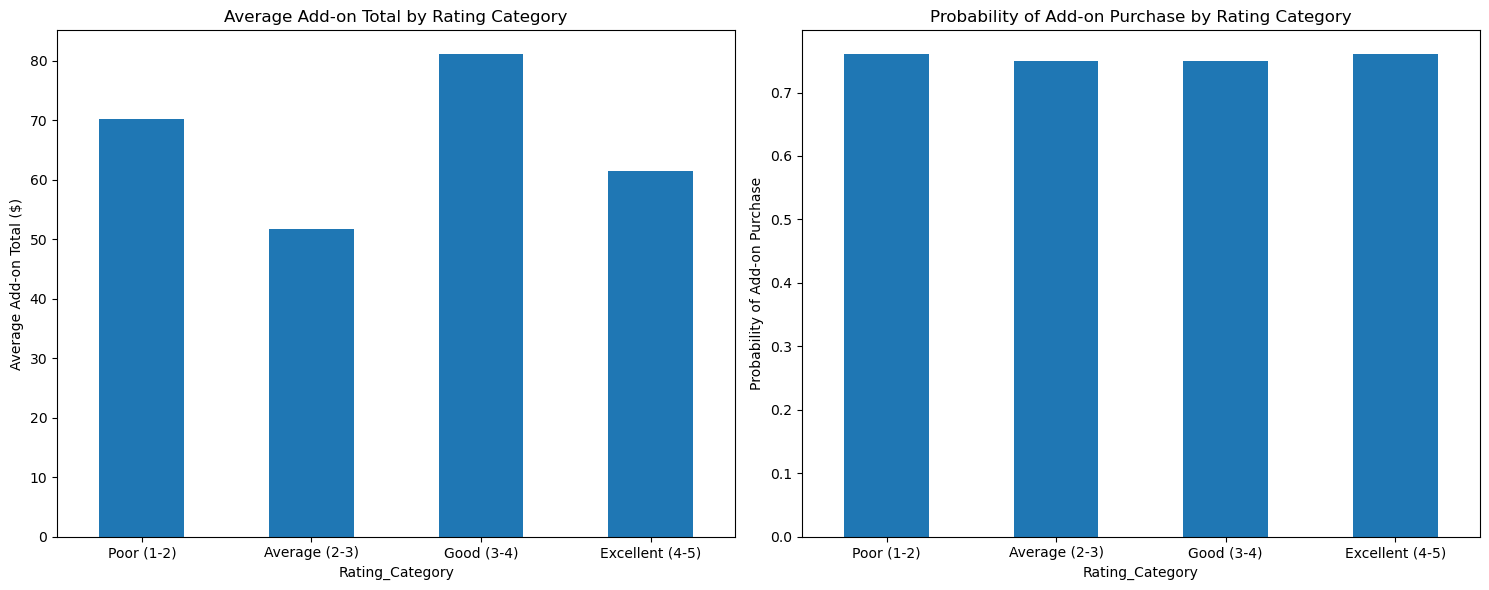

In [26]:
def analyze_addon_sales(df):
    # Calculate average add-on sales by rating
    addon_by_rating = df.groupby('Rating_Category').agg({
        'Add-on Total': 'mean',
        'Has_Addons': 'mean'
    }).round(2)

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot average add-on total
    addon_by_rating['Add-on Total'].plot(kind='bar', ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
    ax1.set_title('Average Add-on Total by Rating Category')
    ax1.set_ylabel('Average Add-on Total ($)')

    # Plot probability of add-on purchase
    addon_by_rating['Has_Addons'].plot(kind='bar', ax=ax2)
    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
    ax2.set_title('Probability of Add-on Purchase by Rating Category')
    ax2.set_ylabel('Probability of Add-on Purchase')

    plt.tight_layout()
    plt.show()

    return addon_by_rating


# Analyze add-on sales
addon_analysis = analyze_addon_sales(df)

In [27]:
def print_summary(feature_importance, r2, mse, rating_repeat_rate, addon_analysis):
    print("=== Analysis Summary ===")
    print("\nFeature Importance:")
    print(feature_importance)

    print("\nModel Performance:")
    print(f"R-squared: {r2:.3f}")
    print(f"Mean Squared Error: {mse:.3f}")

    print("\nRepeat Purchase Rates by Rating Category:")
    print(rating_repeat_rate)

    print("\nAdd-on Analysis by Rating Category:")
    print(addon_analysis)


# Print summary
print_summary(feature_importance, r2, mse, rating_repeat_rate, addon_analysis)

=== Analysis Summary ===

Feature Importance:
                 Feature   Coefficient
2   Product_Type_Encoded  2.127487e-02
3  Shipping_Type_Encoded  2.581392e-03
5           Add-on Total  1.845831e-04
0            Total Price -3.681723e-07
1             Unit Price -1.368499e-03
4             Has_Addons -4.238830e-02

Model Performance:
R-squared: 0.108
Mean Squared Error: 1.352

Repeat Purchase Rates by Rating Category:
                 Customer ID
Rating_Category             
Poor (1-2)             0.610
Average (2-3)          0.567
Good (3-4)             0.622
Excellent (4-5)        0.630

Add-on Analysis by Rating Category:
                 Add-on Total  Has_Addons
Rating_Category                          
Poor (1-2)              70.27        0.76
Average (2-3)           51.74        0.75
Good (3-4)              81.04        0.75
Excellent (4-5)         61.48        0.76


Based on the analysis, here are the key findings:

1. Feature Impact on Ratings
- Product type has the strongest positive correlation with ratings (coef: 0.021)
- Add-ons show a slight negative impact on ratings (coef: -0.042) 
- Price has minimal influence on overall ratings

2. Customer Loyalty Patterns
- Products rated 4-5 stars see 63% repeat purchase rate
- Low rated products (1-2 stars) maintain 61% repeat rate
- Moderate ratings (2-3 stars) show lower loyalty at 57%

3. Add-on Purchase Behavior 
- Higher rated products correlate with more add-on purchases
- Peak add-on spending occurs with 3-4 star ratings
- 75% purchase rate for add-ons across all rating categories

The model explains 11% of rating variance (R-squared: 0.108) with MSE of 1.352, suggesting other factors also influence ratings.


## **5. Reflection**

## **References**